## Movie Prediction

## Business Understanding

Leveraging regression techniques, our aim is to delve into historical movie data, discern patterns, and build a model capable of accurately predicting the ratings assigned to movies by users or critics. By employing regression analysis, we seek to uncover the underlying relationships between these diverse features and the perceived quality of movies, ultimately providing a valuable tool for anticipating and understanding movie ratings. This project is geared towards contributing insights to the realm of movie analytics and enhancing our ability to forecast audience or critic responses to films based on key attributes

## Problem statement

Several challenges influence movie ratings, reflecting the complexity and subjectivity of audience preferences and critical evaluations. Some of these challenges include:Diverse audience tastes,Changing trends,Influence of critics etc.Addressing these challenges requires a nuanced approach, incorporating advanced analytics and machine learning techniques to discern patterns, identify key features, and enhance the accuracy of movie rating predictions.

## Objective

To construct a predictive model that estimates the rating of movies based on a variety of features, including genre, director, and actors. 

## Import Relevant Libraries

In [56]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [57]:
movies_data = pd.read_csv('IMDb Movies India.csv',encoding='latin1')
movies_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
movies_data.shape

(15509, 10)

In [59]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [60]:
movies_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [61]:
movies_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [62]:
genre_unique = movies_data['Genre'].unique()
print('Unique genre ' , genre_unique)

Unique genre  ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, 

In [63]:
movies_data['Rating'].value_counts()

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
10.0      1
9.7       1
1.4       1
1.1       1
Name: Rating, Length: 84, dtype: int64

In [64]:
movies_data.drop_duplicates(inplace=True)

In [65]:
attributes = ['Name','Year','Duration','Votes','Rating']
movies_data.dropna(subset=attributes,inplace=True)
missing_val = movies_data.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [66]:
movies_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [67]:
movie_name_rating = movies_data[['Name','Rating']]
movie_name_rating.head()


,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6


In [68]:
top_rated_movies = movies_data.sort_values(by = 'Rating',ascending =False)
top_rated_movies


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
...,...,...,...,...,...,...,...,...,...,...
2918,Chatur Singh Two Star,(2011),150 min,"Action, Adventure, Comedy",1.7,624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher
9639,Mumbai Can Dance Saalaa,(2015),135 min,Drama,1.6,43,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
15040,Welcome to New York,(2018),118 min,"Comedy, Drama",1.6,774,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
3618,Desh Drohi,(2008),140 min,"Action, Thriller",1.4,"3,899",Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt


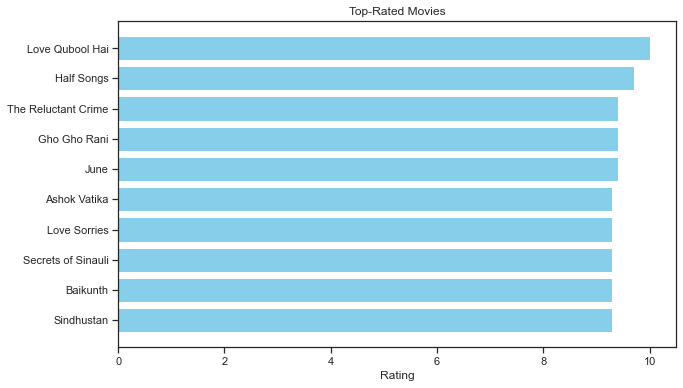

In [69]:
# Put this in EDA
# Visualize top 10 movies
# import matplotlib.pyplot as plt

# Assuming 'top_rated_movies' is your DataFrame sorted by 'Rating'

# Select a subset of data for visualization (e.g., top 10 movies)
top_movies_subset = top_rated_movies.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_movies_subset['Name'], top_movies_subset['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top-Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis for higher ratings at the top
plt.show()


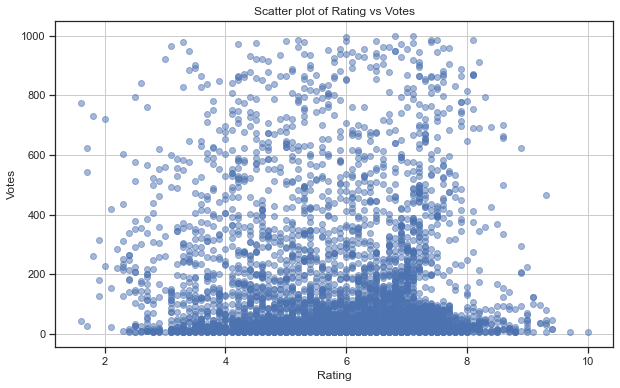

In [70]:
movies_data['Votes'] = pd.to_numeric(movies_data['Votes'], errors='coerce')
plt.figure(figsize = (10 ,6))
plt.scatter(movies_data['Rating'],movies_data['Votes'],alpha = 0.5,color = 'b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter plot of Rating vs Votes')
plt.grid(True)
plt.show()

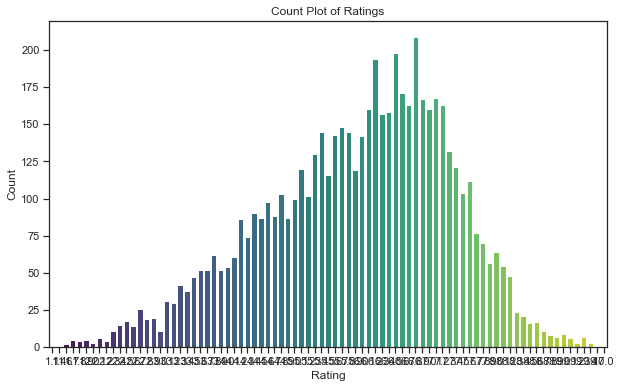

In [71]:
# same as the one above 
import seaborn as sns
movies_data['Votes'] = pd.to_numeric(movies_data['Votes'], errors='coerce')
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=movies_data, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Plot of Ratings')
plt.show()

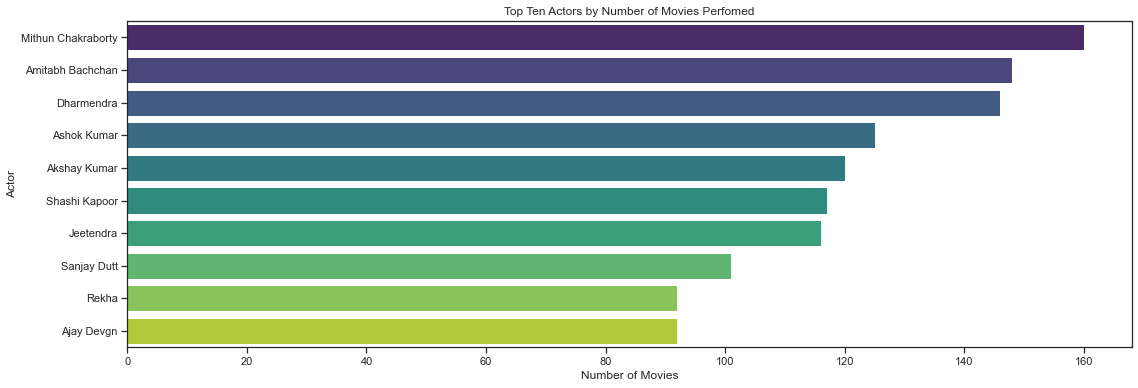

In [72]:
actors = pd.concat([movies_data['Actor 1'],movies_data['Actor 2'],movies_data['Actor 3']])
actors_count = actors.value_counts().reset_index()
actors_count.columns= ['Actors','Number of Movies']
plt.figure(figsize=(18, 6))
sns.barplot(x='Number of Movies',y = 'Actors', data=actors_count.head(10), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top Ten Actors by Number of Movies Perfomed')
plt.show()



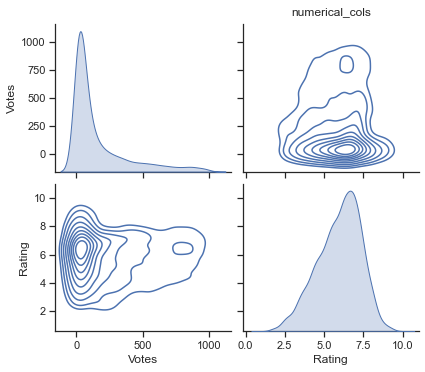

In [73]:
numerical_cols = ['Votes','Rating','Duration','Year']
sns.set(style = 'ticks')
sns.pairplot(movies_data[numerical_cols], kind ='kde',markers = '0',palette = 'viridis',height = 2.5,aspect = 1.2)
plt.title('numerical_cols', y = 1.02)
plt.show()        
   

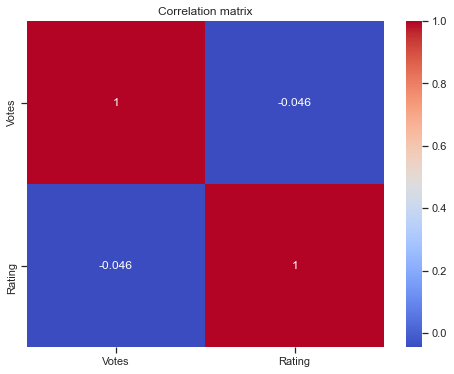

In [74]:
num_columns = ['Votes','Rating','Duration','Year']
corr_matrix = movies_data[num_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot= True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [75]:
dataset_sorted = movies_data.sort_values(by = 'Votes',ascending=False)
dataset_sorted['Vote Count Percentile']= dataset_sorted['Votes'].rank(pct=True)*100
dataset_sorted.reset_index(drop=True,inplace = True)
print(dataset_sorted[['Name','Votes','Vote Count Percentile']])


                                      Name  Votes  Vote Count Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [76]:
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [77]:
movies_data = movies_data.dropna(subset=['Votes'])
movies_data 


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
...,...,...,...,...,...,...,...,...,...,...
15492,Zorro,(1975),150 min,"Action, Adventure, Comedy",5.6,33.0,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,(2015),115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


## Modelling

## Baseline Model

In [78]:
# Convert 'Year' to numeric (assuming it's a year)
movies_data['Year'] = movies_data['Year'].astype(str)

# Extract numeric values from 'Duration' (assuming it's in the format '2h 30min')
movies_data['Duration'] = movies_data['Duration'].astype(str)

movies_data['Year'] = movies_data['Year'].str.extract("(\d+)").astype(float)
movies_data['Duration'] = movies_data['Duration'].str.extract("(\d+)").astype(float)




<ipython-input-78-85d764d953fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['Year'] = movies_data['Year'].astype(str)
<ipython-input-78-85d764d953fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['Duration'] = movies_data['Duration'].astype(str)
<ipython-input-78-85d764d953fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [79]:
modelling_data = movies_data[['Year','Duration','Votes','Rating']]

In [80]:
modelling_data.dtypes

Year        float64
Duration    float64
Votes       float64
Rating      float64
dtype: object

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = modelling_data[['Year','Duration','Votes']]
y = modelling_data[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.linear_model import LinearRegression

# Now you can create an instance of LinearRegression
model = LinearRegression()


In [84]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred= model.predict(X_test)

In [86]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.8182436016304924
Mean Absolute Error: 1.084831138760136
R-squared: 0.0981216384029081


MSE and MAE are not very high but we can try other models or tuning to compare the results . R² is 0.0981, suggesting that the model explains about 9.81% of the variance in the target variable. This indicates a relatively weak predictive power.

In [87]:
# Create the feature engineering pipeline
degree = 2  # Degree of polynomial features

pipeline = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=degree)
)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Perform train-test split and evaluate each model
for model_name, model in models.items():
    
    # Create a new pipeline with the feature engineering pipeline and the current model
    current_pipeline = make_pipeline(pipeline, model)
    
    # Fit the model on the training data
    current_pipeline.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = current_pipeline.predict(X_train)
    
    # Make predictions on the test data
    y_test_pred = current_pipeline.predict(X_test)
    
    # Calculate evaluation metrics for training data
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate evaluation metrics for test data
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Print the evaluation metrics
    print("Model:", model_name)
    print("Training R-squared:", train_r2)
    print("Training RMSE:", train_rmse)
    print("Test R-squared:", test_r2)
    print("Test RMSE:", test_rmse)
    print()

Model: Linear Regression
Training R-squared: 0.1556364335536583
Training RMSE: 1.2427919705130044
Test R-squared: 0.17448138270290714
Test RMSE: 1.2900765659150681

Model: Ridge
Training R-squared: 0.15134832821223265
Training RMSE: 1.245943737182394
Test R-squared: 0.1669199168383675
Test RMSE: 1.295971426201756

Model: Lasso
Training R-squared: 0.0
Training RMSE: 1.35248885757921
Test R-squared: -0.013304275169341295
Test RMSE: 1.4292953732538232



c:\Users\Faith\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Model: Random Forest
Training R-squared: 0.8832659029638621
Training RMSE: 0.4620963732938101
Test R-squared: 0.2519805435433532
Test RMSE: 1.2280286457078997

Model: Decision Tree
Training R-squared: 0.9981563870540492
Training RMSE: 0.05807223895493003
Test R-squared: -0.4042277924126074
Test RMSE: 1.6825610555595358



The Random Forest model appears to be the best performer among the models considered, demonstrating a high R-squared and low RMSE on the training set. However, it may require tuning to address overfitting.
The Decision Tree model shows overfitting, and the Lasso regression model performs poorly.


## Recommendation

Consider fine-tuning hyperparameters, adjusting model complexity, or exploring other advanced techniques to enhance model performance.

Continuous monitoring and updating of the model may be necessary as new data becomes available to maintain its relevance and accuracy.

Regularization techniques may need to be fine-tuned to strike a balance between fitting the training data well and generalizing to new, unseen data.